Question 1

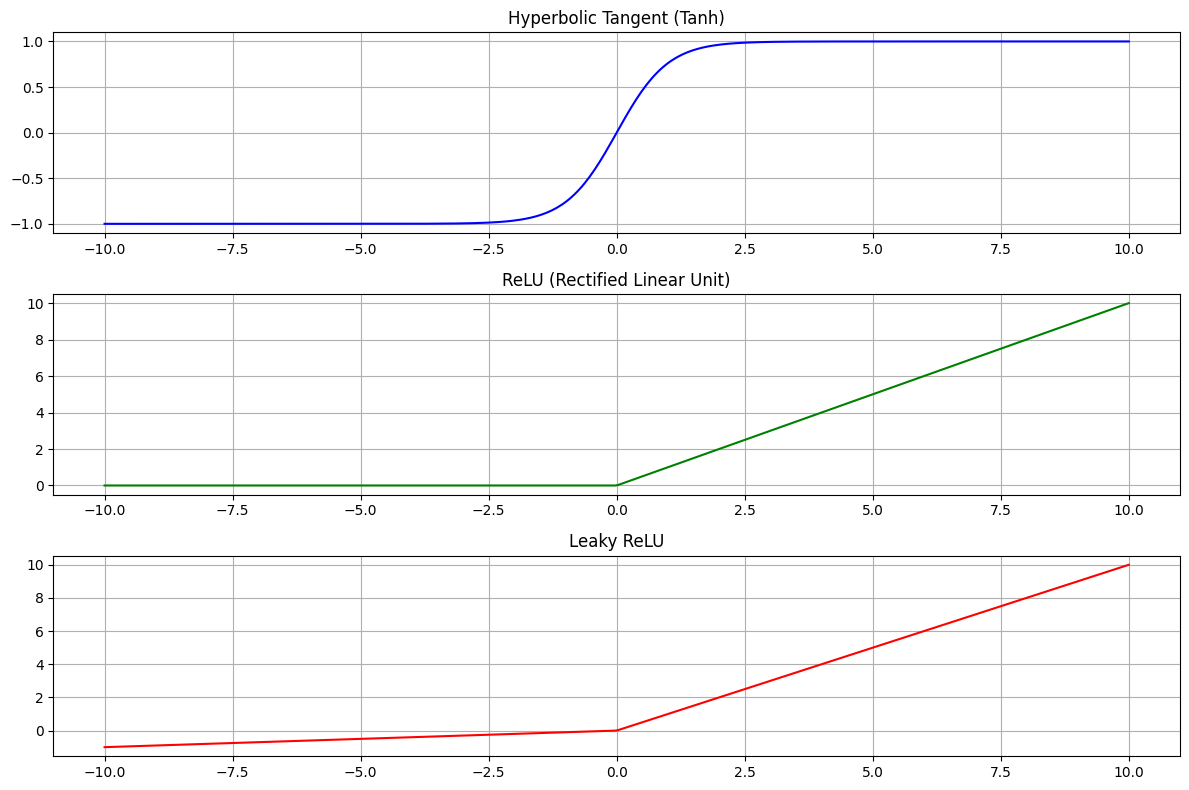

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def tanh(z):
    return np.tanh(z)

def relu(z):
    return np.maximum(0, z)

def leaky_relu(z):
    return np.where(z > 0, z, 0.1* z)

z = np.linspace(-10, 10, 400)

tanh_values = tanh(z)
relu_values = relu(z)
leaky_relu_values = leaky_relu(z)

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(z, tanh_values, label='Tanh', color='blue')
plt.title('Hyperbolic Tangent (Tanh)')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(z, relu_values, label='ReLU', color='green')
plt.title('ReLU (Rectified Linear Unit)')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(z, leaky_relu_values, label='Leaky ReLU', color='red')
plt.title('Leaky ReLU')
plt.grid(True)

plt.tight_layout()
plt.show()


Question 2

In [4]:
import pandas as pd
import numpy as np


from common.optimizer import SGD
from common.trainer import Trainer

from dataset import spiral
from two_layer_net import TwoLayerNet

In [5]:
iris_df = pd.read_csv('dataset/IRIS.csv')

iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
x = np.empty((120, 4))
x[:40] = iris_df.iloc[:40, 0:4].values
x[40:80] = iris_df.iloc[50:90, 0:4].values
x[80:] = iris_df.iloc[100:140, 0:4].values

t = np.zeros((120, 3)) 
t[:40, 0] = 1   
t[40:80, 1] = 1 
t[80:, 2] = 1   


test_x = np.empty((30, 4))
test_x[:10] = iris_df.iloc[40:50, 0:4].values
test_x[10:20] = iris_df.iloc[90:100, 0:4].values
test_x[20:] = iris_df.iloc[140:150, 0:4].values


test_t = np.zeros((30, 3))
test_t[:10, 0] = 1
test_t[10:20, 1] = 1
test_t[20:, 2] = 1

In [7]:
x.min(axis=0)

array([4.3, 2. , 1. , 0.1])

In [8]:
x.max(axis=0) - x.min(axis=0)

array([3.6, 2.4, 5.9, 2.4])

In [9]:

x_min = x.min(axis=0) 
x_max = x.max(axis=0) 
x_scaled = (x - x_min) / (x_max - x_min)
x_scaled_copy = np.copy(x_scaled)

test_x_scaled = (test_x - x_min) / (x_max - x_min)

In [10]:
max_epoch = 1000
batch_size = 24
hidden_size = 8
learning_rate = 0.1

| epoch 1 |  iter 1 / 5 | time 0[s] | loss 1.10
| epoch 2 |  iter 1 / 5 | time 0[s] | loss 1.10
| epoch 3 |  iter 1 / 5 | time 0[s] | loss 1.10
| epoch 4 |  iter 1 / 5 | time 0[s] | loss 1.10
| epoch 5 |  iter 1 / 5 | time 0[s] | loss 1.10
| epoch 6 |  iter 1 / 5 | time 0[s] | loss 1.10
| epoch 7 |  iter 1 / 5 | time 0[s] | loss 1.10
| epoch 8 |  iter 1 / 5 | time 0[s] | loss 1.10
| epoch 9 |  iter 1 / 5 | time 0[s] | loss 1.11
| epoch 10 |  iter 1 / 5 | time 0[s] | loss 1.10
| epoch 11 |  iter 1 / 5 | time 0[s] | loss 1.10
| epoch 12 |  iter 1 / 5 | time 0[s] | loss 1.10
| epoch 13 |  iter 1 / 5 | time 0[s] | loss 1.10
| epoch 14 |  iter 1 / 5 | time 0[s] | loss 1.10
| epoch 15 |  iter 1 / 5 | time 0[s] | loss 1.10
| epoch 16 |  iter 1 / 5 | time 0[s] | loss 1.11
| epoch 17 |  iter 1 / 5 | time 0[s] | loss 1.10
| epoch 18 |  iter 1 / 5 | time 0[s] | loss 1.10
| epoch 19 |  iter 1 / 5 | time 0[s] | loss 1.10
| epoch 20 |  iter 1 / 5 | time 0[s] | loss 1.10
| epoch 21 |  iter 1 / 5 | ti

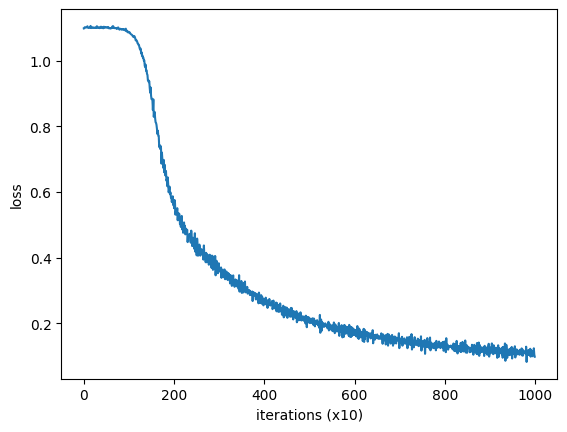

In [11]:
np.random.seed(0)
model = TwoLayerNet(input_size = 4, 
                    hidden_size=hidden_size, 
                    output_size=3)
optimizer = SGD(lr=learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x_scaled, t, max_epoch, batch_size, eval_interval=10)
trainer.plot()

In [12]:
train_pred = model.predict(x_scaled_copy).argmax(axis=1)
train_label = t.argmax(axis=1)

train_accuracy = np.mean(train_pred == train_label)
print('train accuracy:', train_accuracy)
print()

test_pred = model.predict(test_x_scaled).argmax(axis=1)
test_label = test_t.argmax(axis=1)

test_accuracy = np.mean(test_pred == test_label)
print('test accuracy:', test_accuracy)

train accuracy: 0.9583333333333334

test accuracy: 1.0
